In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from particle import literals as lp

from hnl_apps import *
from hnl_apps.utils_limits import *

In [4]:
channels = [r'$\mu\pi$',
            r'$e^-\pi^+$',
            r'$e^+\pi^-$',
            r'$\mu^+\mu^-$',
            r'$e^+e^-$',]

stop_index_fit = 14

eff_fit = np.zeros(shape=(len(masses_all), 24, 10))

In [6]:
from scipy import interpolate

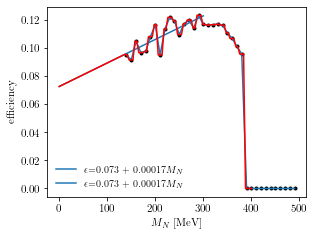

In [7]:
fig,ax = plot_tools.std_fig()

nuPOT = 12.34e20
nubarPOT = 6.29e20
avg_eff_nu_nubar = (eff[:, 10, :5]*nuPOT + eff[:, 10, 5:]*nubarPOT)/(nuPOT+nubarPOT)
summed_avg_eff = np.sum(avg_eff_nu_nubar, axis=1)
_ = ax.scatter(masses_t2k, summed_avg_eff, c='black', marker='.')


stop_index_fit=17
poly = np.polynomial.polynomial.Polynomial.fit(masses_t2k[:stop_index_fit], 
                                           summed_avg_eff[:stop_index_fit], 
                                           deg=1)

ax.plot(np.linspace(0, np.max(masses_t2k[:stop_index_fit]), 15), 
             poly(np.linspace(0, np.max(masses_t2k[:stop_index_fit]), 15)), 
             label=f'$\epsilon$={poly(0):.2g} + {(poly(1)-poly(0)):.2g}$M_N$',
             color=f'C{i%5}')

func_interp = interpolate.interp1d(masses_t2k, summed_avg_eff, bounds_error=False, fill_value='extrapolate', kind='nearest')
ax.plot(masses_t2k, func_interp(masses_t2k), 
             label=f'$\epsilon$={poly(0):.2g} + {(poly(1)-poly(0)):.2g}$M_N$',
             color=f'C{i%5}')

f = lambda x: np.heaviside(x*1e3-140,0)*func_interp(x*1e3) + np.heaviside(-x*1e3+140,0)*poly(x*1e3)
masses = np.linspace(0,0.400,100)
ax.plot(masses*1e3, f(masses), c='red')

ax.set_xlabel(r'$M_N$ [MeV]')
ax.set_ylabel('efficiency')
ax.legend(frameon=False)

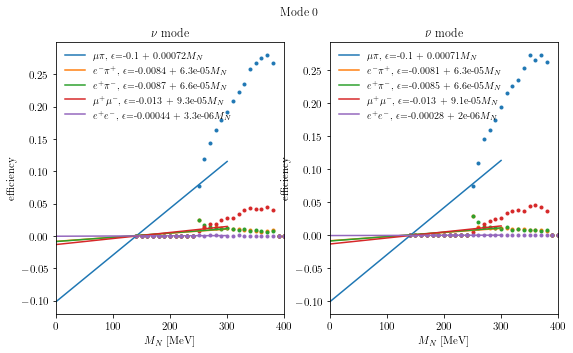

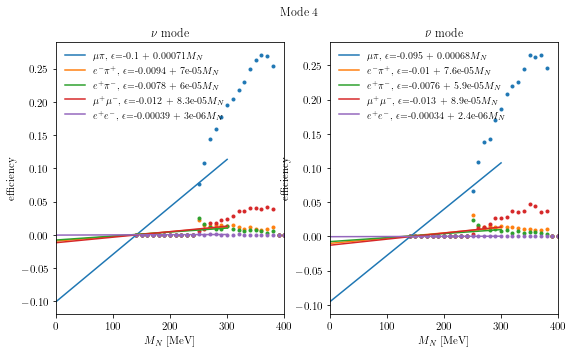

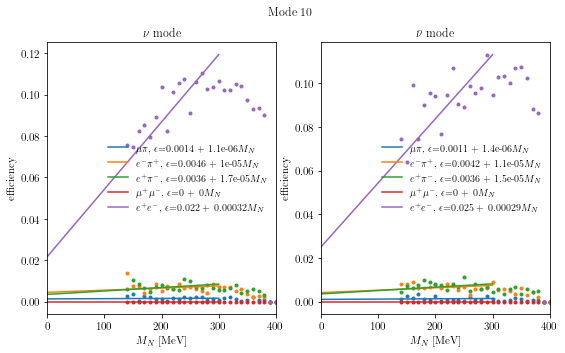

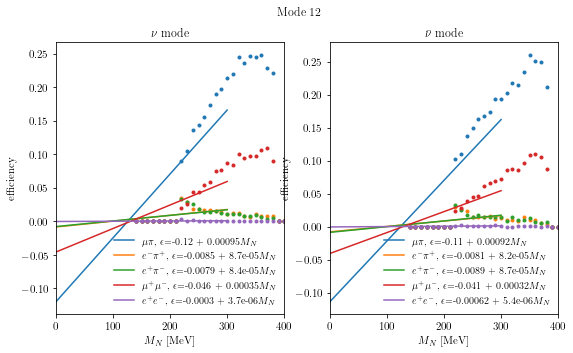

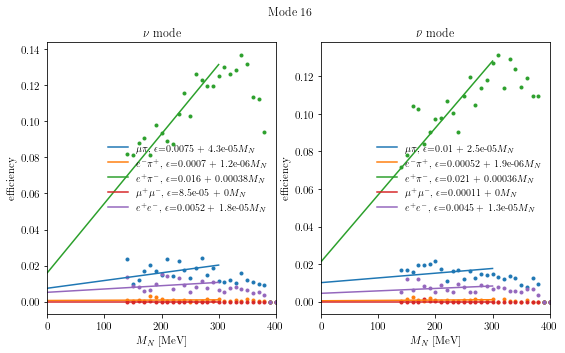

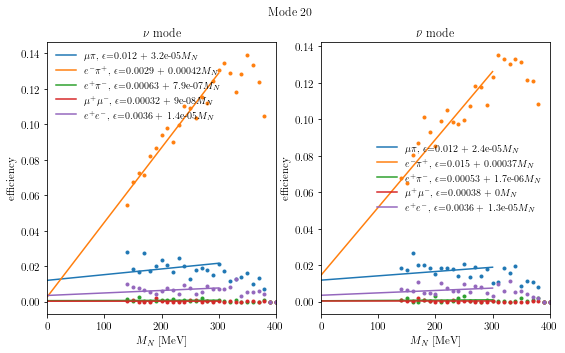

In [8]:
for mode in modes_majorana:
    fig, axs = plt.subplots(1, 2, figsize=(9, 5))

    axs[0].plot(masses_t2k, eff[:, mode, :5], '.')
    axs[1].plot(masses_t2k, eff[:, mode, 5:], '.')

    for i in range(10):
        if i < 5:
            this_ax = axs[0]
        else:
            this_ax = axs[1]
        poly = np.polynomial.polynomial.Polynomial.fit(np.append(0.0,masses_t2k[:stop_index_fit]), 
                                                       np.append(0.0,eff[:stop_index_fit, mode, i]), 
                                                       deg=1)
        if (poly(1)-poly(0)) < 0:
            poly = np.polynomial.polynomial.Polynomial.fit(np.append(0.0,masses_t2k[:stop_index_fit]), 
                                                           np.append(0.0,eff[:stop_index_fit, mode, i]), 
                                                           deg=0)
        this_ax.plot(np.linspace(0, 300, 15), 
                     poly(np.linspace(0, 300, 15)), 
                     label=f'{channels[i%5]}, $\epsilon$={poly(0):.2g} + {(poly(1)-poly(0)):.2g}$M_N$',
                     color=f'C{i%5}')

        eff_fit[:, mode, i] = poly(masses_all)

    for i in range(2):
        axs[i].set_xlim(0, 400)
        axs[i].set_xlabel(r'$M_N$ [MeV]')
        axs[i].set_ylabel('efficiency')
        axs[i].legend(frameon=False)
    plt.suptitle(f'Mode {mode}')
    axs[0].set_title(r'$\nu$ mode')
    axs[1].set_title(r'$\bar{\nu}$ mode')
    plt.savefig(f'./plots/efficiencies/mode_{mode}.png', dpi=250, bbox_inches='tight')

/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:150: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(kallen(a,b,c))


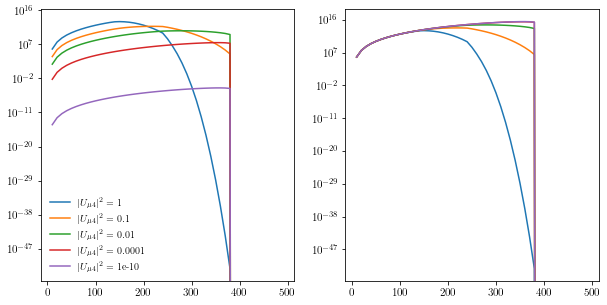

In [11]:
USQRs = [1e-10, 1e-4, 1e-2, 1e-1, 1]
hnl_flux = []
for USQR in USQRs[::-1]:
    hnl_flux.append([])
    for mass in masses_all:
        hnl_flux[-1].append(hnl_tools.get_event_rate_mode((mass/1000, USQR), 
                                                           modes=['nu_e_e'],
                                                           flavor_struct=[0.0, 1, 0.0], 
                                                           detector=exp.nd280))
        
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
hnl_flux_np = np.asarray(hnl_flux)
for i, USQR in enumerate(USQRs[::-1]):
    axs[0].plot(masses_all, hnl_flux_np[i, :, 0], label=r'$|U_{\mu 4}|^2$' + f' = {USQR:.2g}')
    axs[1].plot(masses_all, hnl_flux_np[i, :, 0]/USQR**2, label=r'$|U_{\mu 4}|^2$' + f' = {USQR:.2g}')
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].legend(frameon=False)

In [43]:
nd280fhc = exp.experiment(exp.flag_nd280_fhc)
hnl_flux = []
Usqr = 1e-10
for mass in masses_all:
    hnl_flux.append(hnl_tools.get_event_rate_mode((mass/1000, Usqr), 
                                                  modes=['nu_e_e', 'nu_e_mu', 'mu_pi', 'nu_mu_mu'],
                                                       flavor_struct=[0.0, 1, 0.0], 
                                                       detector=exp.nd280)/Usqr**2)
hnl_flux = np.squeeze(np.asarray(hnl_flux))

/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:150: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(kallen(a,b,c))


In [44]:
flux_fit = np.zeros((len(masses_all), flux.shape[1]))

flux_fit[:, 0] = hnl_flux[:, 2]/2
flux_fit[:, 4] = hnl_flux[:, 2]/2
flux_fit[:, 10] = hnl_flux[:, 0]*2
flux_fit[:, 12] = hnl_flux[:, 3]
flux_fit[:, 16] = hnl_flux[:, 1]/2
flux_fit[:, 20] = hnl_flux[:, 1]/2

In [45]:
flux_fit_dirac = np.zeros((len(masses_all), flux.shape[1]))
flux_fit_majorana = np.zeros((len(masses_all), flux.shape[1]))

flux_fit_dirac[:, 0] = hnl_flux[:, 2]
flux_fit_dirac[:, 4] = hnl_flux[:, 2]
flux_fit_dirac[:, 10] = hnl_flux[:, 0]
flux_fit_dirac[:, 12] = hnl_flux[:, 3]
flux_fit_dirac[:, 16] = hnl_flux[:, 1]

flux_fit_majorana[:, 0] = hnl_flux[:, 2]
flux_fit_majorana[:, 4] = hnl_flux[:, 2]
flux_fit_majorana[:, 10] = hnl_flux[:, 0]*2
flux_fit_majorana[:, 12] = hnl_flux[:, 3]*2
flux_fit_majorana[:, 16] = hnl_flux[:, 1]
flux_fit_majorana[:, 20] = hnl_flux[:, 1]

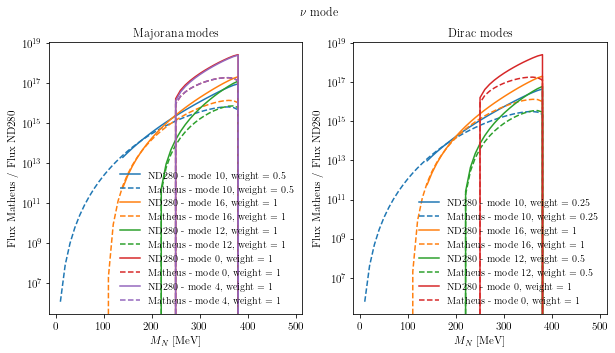

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(r'$\nu$ mode')

for i, (mode, weight) in enumerate(zip([10, 16, 12, 0, 4], [0.5, 1, 1, 1, 1])):
    axs[0].plot(masses_t2k, flux[:, mode]*weight, f'C{i}', label=f'ND280 - mode {mode}, weight = {weight}')
    axs[0].plot(masses_all, flux_fit_majorana[:, mode], f'C{i}--', label=f'Matheus - mode {mode}, weight = {weight}')
    
axs[0].set_title('Majorana modes')

for i, (mode, weight) in enumerate(zip([10, 16, 12, 0], [0.25, 1, 0.5, 1])):
    axs[1].plot(masses_t2k, flux[:, mode]*weight, f'C{i}', label=f'ND280 - mode {mode}, weight = {weight}')
    axs[1].plot(masses_all, flux_fit_dirac[:, mode], f'C{i}--', label=f'Matheus - mode {mode}, weight = {weight}')
axs[1].set_title('Dirac modes')

for ax in axs:
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel('Flux Matheus / Flux ND280')
    ax.legend(frameon=False)
    ax.set_yscale('log')

<ipython-input-47-2a829acbea28>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit_majorana[13:, mode]/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
<ipython-input-47-2a829acbea28>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit_majorana[13:, mode]/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
<ipython-input-47-2a829acbea28>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit_majorana[13:, mode]/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
<ipython-input-47-2a829acbea28>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit_majorana[13:, mode]/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
<ipython-input-47-2a829acbea28>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit_majorana[13:, mode]/(flux[:, mode]*weight), f'C{i}--', la

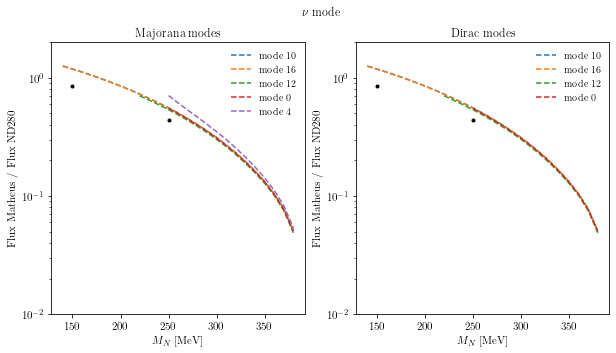

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(r'$\nu$ mode')

for i, (mode, weight) in enumerate(zip([10, 16, 12, 0, 4], [0.5, 1, 1, 1, 1])):
    axs[0].plot(masses_t2k, flux_fit_majorana[13:, mode]/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')

axs[0].plot([150, 250], [0.85, 0.44], 'k.')
axs[0].set_title('Majorana modes')

for i, (mode, weight) in enumerate(zip([10, 16, 12, 0], [0.25, 1, 0.5, 1])):
    axs[1].plot(masses_t2k, flux_fit_dirac[13:, mode]/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
axs[1].plot([150, 250], [0.85, 0.44], 'k.')
axs[1].set_title('Dirac modes')

for ax in axs:
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel('Flux Matheus / Flux ND280')
    ax.legend(frameon=False)
    ax.set_yscale('log')
    ax.set_ylim(1e-2,2)
fig.savefig("plots/ratio_of_T2K_to_matheus.png", dpi=400)

<ipython-input-41-1fc70e01d7e2>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit[13:, mode]*weight/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
<ipython-input-41-1fc70e01d7e2>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit[13:, mode]*weight/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
<ipython-input-41-1fc70e01d7e2>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit[13:, mode]*weight/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
<ipython-input-41-1fc70e01d7e2>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit[13:, mode]*weight/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
<ipython-input-41-1fc70e01d7e2>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit[13:, mode]*weight/(flux[:, mode]*weight), f'C{i}--', label=f'mode

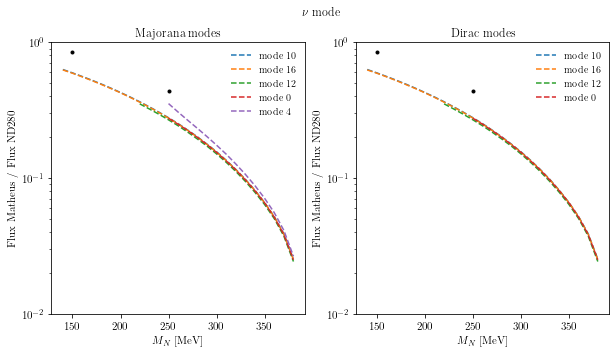

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(r'$\nu$ mode')

for i, (mode, weight) in enumerate(zip([10, 16, 12, 0, 4], [0.5, 1, 1, 1, 1])):
    axs[0].plot(masses_t2k, flux_fit[13:, mode]*weight/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')

axs[0].plot([150, 250], [0.85, 0.44], 'k.')
axs[0].set_title('Majorana modes')

for i, (mode, weight) in enumerate(zip([10, 16, 12, 0], [0.25, 1, 0.5, 1])):
    axs[1].plot(masses_t2k, flux_fit[13:, mode]*weight/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
axs[1].plot([150, 250], [0.85, 0.44], 'k.')
axs[1].set_title('Dirac modes')

for ax in axs:
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel('Flux Matheus / Flux ND280')
    ax.legend(frameon=False)
    ax.set_yscale('log')
    ax.set_ylim(1e-2,1)
fig.savefig("plots/ratio_of_T2K_to_matheus.png", dpi=400)

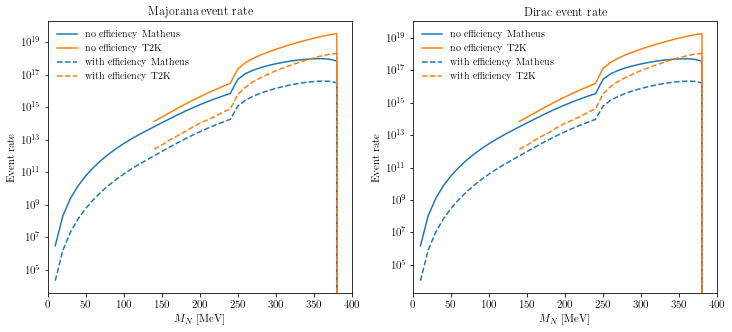

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
pot_factor = 1
axs[0].set_title('Majorana event rate')
axs[1].set_title('Dirac event rate')
    
axs[0].plot(masses_all, pot_factor*n_events_T2K(np.ones(eff_fit.shape), flux_fit, 
                                                          channels=np.arange(5), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana),
            'C0-', label=r'no efficiency Matheus')
axs[0].plot(masses_t2k, n_events_T2K(np.ones(eff.shape), flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana),
            'C1-', label=r'no efficiency T2K')
axs[0].plot(masses_all, pot_factor*n_events_T2K(eff_fit, flux_fit, 
                                                          channels=np.arange(5), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana),
            'C0--', label=r'with efficiency Matheus')
axs[0].plot(masses_t2k, n_events_T2K(eff, flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana),
            'C1--', label=r'with efficiency T2K')



axs[1].plot(masses_all, pot_factor*n_events_T2K(np.ones(eff_fit.shape), flux_fit, 
                                                          channels=np.arange(5), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac),
            'C0-', label=r'no efficiency Matheus')
axs[1].plot(masses_t2k, n_events_T2K(np.ones(eff.shape), flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac),
            'C1-', label=r'no efficiency T2K')
axs[1].plot(masses_all, pot_factor*n_events_T2K(eff_fit, flux_fit, 
                                                          channels=np.arange(5), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac),
            'C0--', label=r'with efficiency Matheus')
axs[1].plot(masses_t2k, n_events_T2K(eff, flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac),
            'C1--', label=r'with efficiency T2K')

for ax in axs:
    ax.set_yscale('log')
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel(r'Event rate')
    ax.legend(frameon=False)
#     ax.set_ylim(1e-9, 1e-6)
    ax.set_xlim(0, 400)

/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta


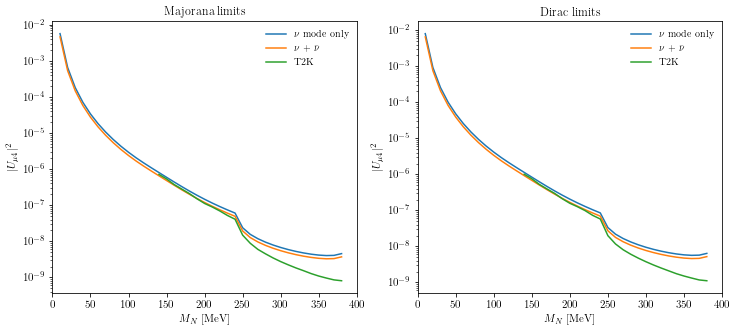

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
pot_factor = (6.29+12.34)/12.34
pot_factor = (6.29+12.34)/12.34
axs[0].set_title('Majorana limits')
axs[1].set_title('Dirac limits')
    
axs[0].plot(masses_all, bayesian_upper_limit(n_events_T2K(eff_fit, flux_fit_majorana, 
                                                          channels=np.arange(5), 
                                                          modes=modes_majorana, 
                                                          mode_weights=np.ones(len(modes_majorana)))),
            label=r'$\nu$ mode only')

axs[0].plot(masses_all, bayesian_upper_limit(pot_factor*n_events_T2K(eff_fit, flux_fit_majorana, 
                                                          channels=np.arange(5), 
                                                          modes=modes_majorana, 
                                                          mode_weights=np.ones(len(modes_majorana)))),
            label=r'$\nu$ + $\bar{\nu}$')

axs[0].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana)),
            label=r'T2K ')

axs[1].plot(masses_all, bayesian_upper_limit(n_events_T2K(eff_fit, flux_fit_dirac, 
                                                          channels=np.arange(5), 
                                                          modes=modes_dirac, 
                                                          mode_weights=np.ones(len(modes_dirac)))),
            label=r'$\nu$ mode only')

axs[1].plot(masses_all, bayesian_upper_limit(pot_factor*n_events_T2K(eff_fit, flux_fit_dirac, 
                                                          channels=np.arange(5), 
                                                          modes=modes_dirac, 
                                                          mode_weights=np.ones(len(modes_dirac)))),
            label=r'$\nu$ + $\bar{\nu}$')

axs[1].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac)),
            label=r'T2K')

for ax in axs:
    ax.set_yscale('log')
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel(r'$|U_{\mu 4}|^2$')
    ax.legend(frameon=False)
    ax.set_xlim(0, 400)

/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/Users/matheushostert/Repos/stdHNL/hnl_apps/utils_limits.py:26: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta


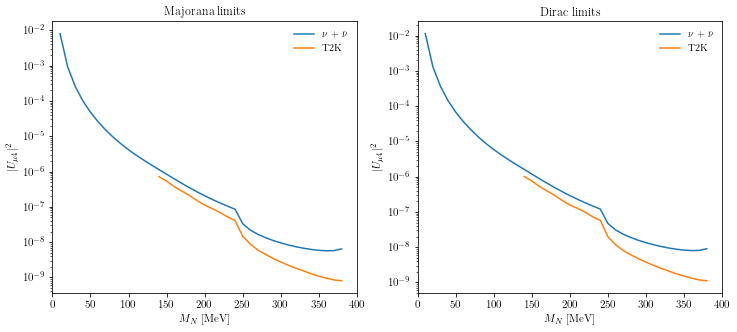

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
pot_factor = 1
axs[0].set_title('Majorana limits')
axs[1].set_title('Dirac limits')


axs[0].plot(masses_all, bayesian_upper_limit(pot_factor*n_events_T2K(eff_fit, flux_fit, 
                                                          channels=np.arange(5), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana)),
            label=r'$\nu$ + $\bar{\nu}$')

axs[0].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana)),
            label=r'T2K ')


axs[1].plot(masses_all, bayesian_upper_limit(pot_factor*n_events_T2K(eff_fit, flux_fit, 
                                                          channels=np.arange(5), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac)),
            label=r'$\nu$ + $\bar{\nu}$')

axs[1].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac)),
            label=r'T2K')

for ax in axs:
    ax.set_yscale('log')
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel(r'$|U_{\mu 4}|^2$')
    ax.legend(frameon=False)
    ax.set_xlim(0, 400)

In [51]:
out_fit = n_events_T2K_mass_couplings(masses_all, 
                            mixings=np.geomspace(1e-10, 1, 40), 
                            eff=eff_fit, 
                            channels=np.arange(5),
                            modes=modes_majorana, 
                            mode_weights=weights_modes_majorana)

NameError: name 'n_events_T2K_mass_couplings' is not defined

In [52]:
cntrs = []
cntrs.append(plt.contour(*out_fit, 
                   levels=[2.3]))
total_pot_factor = 200*0.85/(12.34+6.29)
volume_factor = (1 + 2*180*70*212 /(170*196*56*3) * 0.8)
cntrs.append(plt.contour(out_fit[0], 
                   out_fit[1], 
                   out_fit[2]*total_pot_factor*volume_factor,
                   levels=[2.3],
                   linestyles=['dashed']))
for cntr in cntrs:
    line = cntr.collections[0].get_paths()[0].vertices
    plt.plot(line[:, 0], line[:, 1])
plt.yscale('log')
plt.xlabel(r'$M_N$ [MeV]')
plt.ylabel(r'$|U_{\mu 4}|^2$')
plt.legend(frameon=False)
plt.xlim(0, 400)

NameError: name 'out_fit' is not defined

(1e-10, 1)

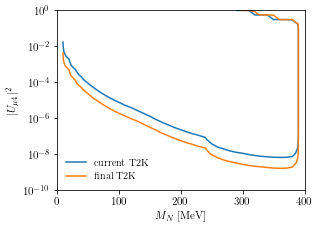

In [21]:
for cntr, label in zip(cntrs, ['current T2K', 'final T2K']):
    line = cntr.collections[0].get_paths()[0].vertices
    plt.plot(line[:, 0], line[:, 1], label=label)
    np.savetxt(f"limits_computed/{label.replace(' ', '')}.csv", line, delimiter=",")
plt.yscale('log')
plt.xlabel(r'$M_N$ [MeV]')
plt.ylabel(r'$|U_{\mu 4}|^2$')
plt.legend(frameon=False)
plt.xlim(0, 400)
plt.ylim(1e-10, 1)

# Final plot with all constraints

In [22]:
from Nlimits import *
from Nlimits.constraint_dict import *
from Nlimits.plotter import *
from scipy import interpolate


In [23]:
list_of_bounds=umu4.get_individual_bounds(muon_bounds, m4min=0.01, m4max=0.2)
print(list_of_bounds.keys())

dict_keys(['atre_knumu', 'PS191', 'E949', 'KEK', 'deGouvea_lowmass', 'deGouvea_LNU', 'SuperK_19', 'T2K_19', 'NA62_21', 'PIENU_19_lowT', 'PIENU_19_highT', 'PSI_87', 'SIN_87'])


NameError: name 'flux_fit_majorana' is not defined

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: computer modern roman


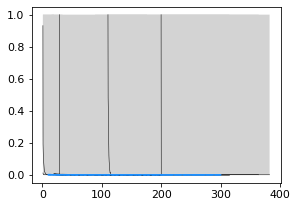

In [24]:
######
figmu = plt.figure()
axmu = figmu.add_axes(axes_form)

x = np.logspace(np.log10(10),np.log10(300), 1000, endpoint=True)

# _ = plot_bound(axmu, list_of_bounds['SIN_87'], units=1e3)
_ = plot_bound(axmu, list_of_bounds['PSI_87'], units=1e3)
_ = plot_bound(axmu, list_of_bounds['PS191'], units=1e3)
_ = plot_bound(axmu, list_of_bounds['KEK'], units=1e3)
_ = plot_bound(axmu, list_of_bounds['NA62_21'], units=1e3)
_ = plot_bound(axmu, list_of_bounds['PIENU_19_lowT'], units=1e3)
_ = plot_bound(axmu, list_of_bounds['PIENU_19_highT'], units=1e3)
_ = plot_bound(axmu, list_of_bounds['deGouvea_lowmass'], units=1e3)

##
this_file = 'digitized/muboone_kelly_machado/PS_eff_avg.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
units = 1
f = interpolate.interp1d(m4*units, Umu4sq, kind='linear', bounds_error=False, fill_value=None, assume_sorted=False)    
axmu.plot(x, f(x), c='black', ls='-', label='Kelly \& Machado 1')

##
this_file = 'digitized/muboone_kelly_machado/PS_eff_scalar.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
units = 1
f = interpolate.interp1d(m4*units, Umu4sq, kind='linear', bounds_error=False, fill_value=None, assume_sorted=False)    
axmu.plot(x, f(x), c='black', ls='--', label='Kelly \& Machado 2')


##
this_file = 'Nlimits/digitized/PS-191/UeUmu_K.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
fK = interpolate.interp1d(m4*units, Umu4sq, kind='linear', bounds_error=False, fill_value=1, assume_sorted=False)    

this_file = 'Nlimits/digitized/PS-191/UeUmu_pi.dat'
m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
fpi = interpolate.interp1d(m4*units, Umu4sq, kind='linear', bounds_error=False, fill_value=1, assume_sorted=False)    

gL = -1/2 + 0.223
gR = 0.22343
scaling = np.sqrt(gL**2 +gR**2 + gR*gL)
combined = np.amin([fK(x),fpi(x)],axis=0)

NBAKGS = 30
lower_line = combined/scaling
sqrtN_line = combined/scaling*np.sqrt(np.sqrt(NBAKGS)/2.3)
N_line = combined/scaling*np.sqrt(np.sqrt(NBAKGS**2)/2.3)

axmu.fill_between(x, lower_line, sqrtN_line, color='lightblue', lw=0.0)
axmu.fill_between(x, lower_line, N_line, color='lightblue', lw=0.0,alpha=0.8)
axmu.plot(x, lower_line, color='dodgerblue', ls='-', label=fr'my PS-191 $N_{{\rm bkg}}=0$')
axmu.plot(x, sqrtN_line, color='dodgerblue', ls='--', label=fr'my PS-191 $N_{{\rm sig}}={np.sqrt(NBAKGS)}$')
axmu.plot(x, N_line, color='dodgerblue', dashes=(2,1), label=fr'my PS-191 $N_{{\rm sig}}={np.sqrt(NBAKGS)}$')


list_of_bounds=umu4.get_individual_bounds(muon_bounds, m4min=0.01, m4max=0.2)

# MN,usqr_bound = list_of_bounds['kusenko_all_v2']
# axmu.plot(MN*1e3, usqr_bound, color = 'red', label=fr"PS-191 Kusenko")

##
# this_file = 'digitized/NA62/NA62.dat'
# m4, Umu4sq = np.genfromtxt(this_file, unpack=True)
# axmu.plot(m4*1e3, Umu4sq, c='blue', ls='--', label='NA62 (future)')

##############
# OUR CURVE nu+nubar
axmu.plot(masses_all, bayesian_upper_limit(pot_factor*n_events_T2K(eff_fit, flux_fit_majorana, 
                                                          channels=np.arange(5), 
                                                          modes=modes_majorana, 
                                                          mode_weights=np.ones(len(modes_majorana)))),
            label=r'$\nu$ + $\bar{\nu}$',
             c='darkorange')



axmu.set_title(r"$|U_{e4}| = |U_{\tau 4}| = 0$",fontsize=10)
# figmu.legend(loc='lower left', frameon=False, ncol=3)



axmu.set_xlim(np.min(x),np.max(x))
axmu.set_ylim(1e-8,2e-2)
axmu.set_xscale("log")
axmu.set_yscale("log")
axmu.set_ylabel(r"$|U_{mu 4}|^2$")
axmu.set_xlabel(r"$m_{N}$/MeV")
axmu.set_yticks([1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2])
axmu.grid(axis='y', which='both',dashes=(6,1),alpha=0.5,c='black',lw=0.1)
axmu.grid(axis='x', which='major',dashes=(6,1),alpha=0.5,c='black',lw=0.1)
figmu.savefig('plots/result.pdf')
figmu.savefig('plots/result.png', dpi=400)